# Project: Wrangling and Analyze Data

## Data Gathering

In [38]:
#import the necessary libraries
import pandas as pd
import numpy as np
import os 
import requests
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

**1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)**

In [238]:
 df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [239]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)**

In [35]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [49]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, auth=('user', 'pass'))
response.status_code

200

In [50]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [51]:
os.listdir(folder_name)

['image-predictions.tsv']

In [52]:
df = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')

In [53]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [24]:

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
        #except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 759793422261743616
Fail
891: 759566828574212096
Fail
892: 759557299618865152
Fail
893: 759447681597108224
Fail
894: 759446261539934208
Fail
895: 7591

Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167: 722613351520608256
Fail
1168: 721503162398597120
Fail
1169: 721001180231503872
Fail
1170: 720785406564900865
Fail
1171: 720775346191278080
Fail
1172: 720415127506415616
Fail
1173: 720389942216527872
Fail
1174: 720340705894408192
Fail
1175: 720059472081784833
Fail
1176: 720043174954147842
Fail
1177: 719991154352222208
Fail
1178: 719704490224398336
Fail
1179: 719551379208073216
Fail
1180: 719367763014393856
Fail
1181: 719339463458033665
Fail
1182: 719332531645071360
Fail
1183: 718971898235854848
Fail
1184:

Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441: 696886256886657024
Fail
1442: 696877980375769088
Fail
1443: 696754882863349760
Fail
1444: 696744641916489729
Fail
1445: 696713835009417216
Fail
1446: 696518437233913856
Fail
1447: 696490539101908992
Fail
1448: 696488710901260288
Fail
1449: 696405997980676096
Fail
1450: 696100768806522880
Fail
1451: 695816827381944320
Fail
1452: 695794761660297217
Fail
1453: 695767669421768709
Fail
1454: 695629776980148225
Fail
1455: 695446424020918272
Fail
1456: 695409464418041856
Fail
1457: 695314793360662529
Fail
1458: 695095422348574720
Fail
1459: 695074328191332352
Fail
1460: 695064344191721472
Fail
1461: 695051054296211456
Fail
1462: 694925794720792577
Fail
1463: 694905863685980160
Fail
1464: 694669722378485760
Fail
1465: 694356675654983680
Fail
1466: 694352839993344000
Fail
1467: 694342028726001664
Fail
1468: 694329668942569472
Fail
1469: 694206574471057408
Fail
1470: 694183373896572928
Fail
1471: 694001791655137281
Fail
1472:

Fail
1716: 680221482581123072
Fail
1717: 680206703334408192
Fail
1718: 680191257256136705
Fail
1719: 680176173301628928
Fail
1720: 680161097740095489
Fail
1721: 680145970311643136
Fail
1722: 680130881361686529
Fail
1723: 680115823365742593
Fail
1724: 680100725817409536
Fail
1725: 680085611152338944
Fail
1726: 680070545539371008
Fail
1727: 680055455951884288
Fail
1728: 679877062409191424
Fail
1729: 679872969355714560
Fail
1730: 679862121895714818
Fail
1731: 679854723806179328
Fail
1732: 679844490799091713
Fail
1733: 679828447187857408
Fail
1734: 679777920601223168
Fail
1735: 679736210798047232
Fail
1736: 679729593985699840
Fail
1737: 679722016581222400
Fail
1738: 679530280114372609
Fail
1739: 679527802031484928
Fail
1740: 679511351870550016
Fail
1741: 679503373272485890
Fail
1742: 679475951516934144
Fail
1743: 679462823135686656
Fail
1744: 679405845277462528
Fail
1745: 679158373988876288
Fail
1746: 679148763231985668
Fail
1747: 679132435750195208
Fail
1748: 679111216690831360
Fail
1749:

Fail
1990: 672828477930868736
Fail
1991: 672640509974827008
Fail
1992: 672622327801233409
Fail
1993: 672614745925664768
Fail
1994: 672609152938721280
Fail
1995: 672604026190569472
Fail
1996: 672594978741354496
Fail
1997: 672591762242805761
Fail
1998: 672591271085670400
Fail
1999: 672538107540070400
Fail
2000: 672523490734551040
Fail
2001: 672488522314567680
Fail
2002: 672482722825261057
Fail
2003: 672481316919734272
Fail
2004: 672475084225949696
Fail
2005: 672466075045466113
Fail
2006: 672272411274932228
Fail
2007: 672267570918129665
Fail
2008: 672264251789176834
Fail
2009: 672256522047614977
Fail
2010: 672254177670729728
Fail
2011: 672248013293752320
Fail
2012: 672245253877968896
Fail
2013: 672239279297454080
Fail
2014: 672231046314901505
Fail
2015: 672222792075620352
Fail
2016: 672205392827572224
Fail
2017: 672169685991993344
Fail
2018: 672160042234327040
Fail
2019: 672139350159835138
Fail
2020: 672125275208069120
Fail
2021: 672095186491711488
Fail
2022: 672082170312290304
Fail
2023:

Fail
2274: 667470559035432960
Fail
2275: 667455448082227200
Fail
2276: 667453023279554560
Fail
2277: 667443425659232256
Fail
2278: 667437278097252352
Fail
2279: 667435689202614272
Fail
2280: 667405339315146752
Fail
2281: 667393430834667520
Fail
2282: 667369227918143488
Fail
2283: 667211855547486208
Fail
2284: 667200525029539841
Fail
2285: 667192066997374976
Fail
2286: 667188689915760640
Fail
2287: 667182792070062081
Fail
2288: 667177989038297088
Fail
2289: 667176164155375616
Fail
2290: 667174963120574464
Fail
2291: 667171260800061440
Fail
2292: 667165590075940865
Fail
2293: 667160273090932737
Fail
2294: 667152164079423490
Fail
2295: 667138269671505920
Fail
2296: 667119796878725120
Fail
2297: 667090893657276420
Fail
2298: 667073648344346624
Fail
2299: 667070482143944705
Fail
2300: 667065535570550784
Fail
2301: 667062181243039745
Fail
2302: 667044094246576128
Fail
2303: 667012601033924608
Fail
2304: 666996132027977728
Fail
2305: 666983947667116034
Fail
2306: 666837028449972224
Fail
2307:

In [240]:
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
data = [ ]
for line in lines:
    data.append(json.loads(line))

data_json = pd.DataFrame(data)

In [241]:
data_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### Accessing The Dataset

#### Twitter Enhanced Dataset

In [28]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [29]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [30]:
df_1.corr()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
tweet_id,1.000000,0.940568,0.135083,0.744733,0.144644,0.049496,-0.028273
in_reply_to_status_id,0.940568,1.000000,0.136589,NaN,NaN,0.265525,-0.109931
in_reply_to_user_id,0.135083,0.136589,1.000000,NaN,NaN,-0.034593,-0.019973
retweeted_status_id,0.744733,NaN,NaN,1.000000,0.168284,0.171930,-0.037949
retweeted_status_user_id,0.144644,NaN,NaN,0.168284,1.000000,0.016674,-0.009668
rating_numerator,0.049496,0.265525,-0.034593,0.171930,0.016674,1.000000,0.150388
rating_denominator,-0.028273,-0.109931,-0.019973,-0.037949,-0.009668,0.150388,1.000000


In [31]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<AxesSubplot:>

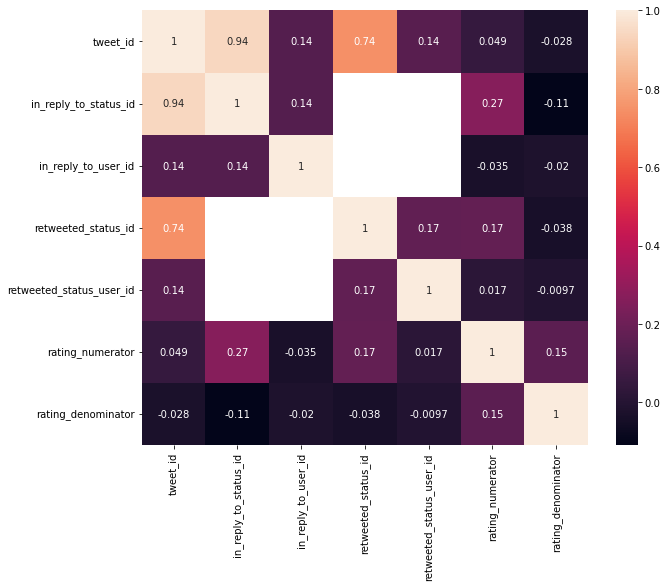

In [62]:
import seaborn as sns
f,ax=plt.subplots(figsize=(10,8))
df_corr= df_1.corr()
sns.heatmap(df_corr,annot=True)
#df.corr()

#### Image Prediction dataset

In [57]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [58]:
df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<AxesSubplot:>

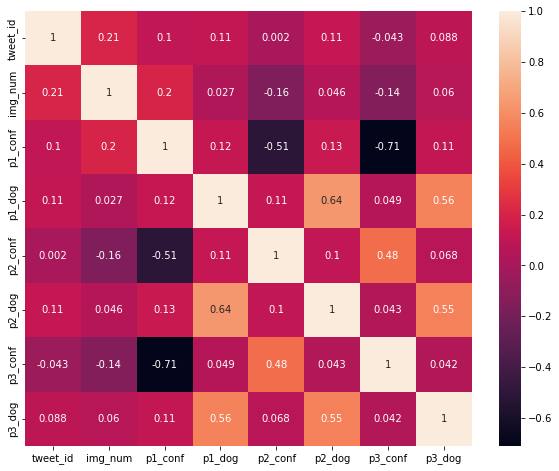

In [63]:
f,ax=plt.subplots(figsize=(10,8))
df_corr= df.corr()
sns.heatmap(df_corr,annot=True)
#df.corr()

#### The Json_Dataset

In [64]:
data_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [65]:
data_json.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [66]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

<AxesSubplot:>

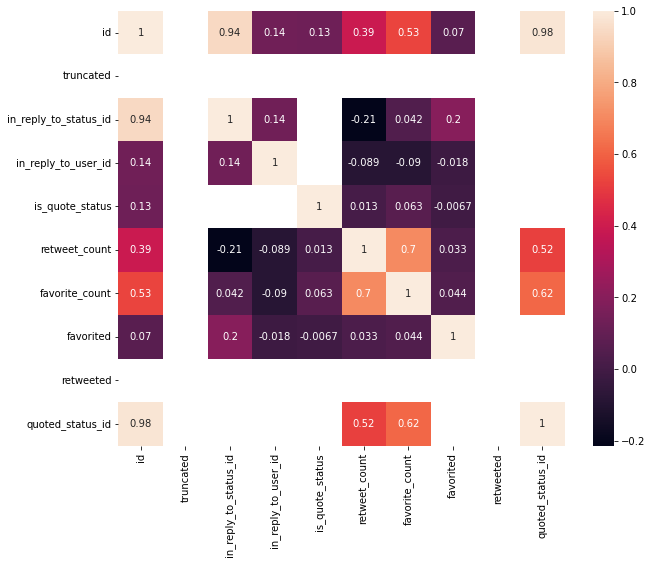

In [67]:
f,ax=plt.subplots(figsize=(10,8))
df_corr= data_json.corr()
sns.heatmap(df_corr,annot=True)
#df.corr()

**Quality issues**

would have to drop all the retweet rows with non-null values as these are duplicated records of the original tweets in the twitter enhanced dataset and json dataset.

Presence of Null values in the colums like the (in_reply_to_status_id ) and some other columns in the twitter Enhanced data set.

The timestamp column in the twitter Enhaced dataset in object format instead of datetime format.


On the twitter Enhaced dataset i noticed some of the values entered under the dog breed column were not dog breeds rather some random inputs. 

The Datatype of both the rating numerator and denominator are in integer instead of float.

The Created_at column of the data_json dataset in object format instead of datetime format.

Presence of irrelevant columns containing all null values i.e ('geo', 'contributors' and 'coordinate') or very few non-null values i.e ('quoted_status_id', 'quoted_status_id_str' , 'quoted_status', 'place' ) in the json dataset.


The Column 'possibly_sensitive_appealable' and 'possibly_sensitive'in the json dataset should be type boolean instead of int64.


Id and Id_str are duplicates of each other, we will need to drop the Id_str column and rename Id column to tweet_id to aid our merging.




**Tidiness issues** 

we need to create a new column to combine the dog stages into one (1) column.

The three(3) tables had to be merged to get reasonable insights from the dataset.


### Copy datasets before cleaning

In [69]:
df_twitter = df_1.copy()
df_image = df.copy()
df_json = data_json.copy()

### Data Cleaning

#### We now clean the Twitter Enhanced Dataset

In [131]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Issue one

#### Define : We would have to drop all the retweet rows with non-null values as these are duplicated records of the original tweets. in the twitter enhanced dataset and the json dataset.

#### Code

In [242]:
print(df_1['retweeted_status_id'].notnull().sum())

181


In [243]:
drops_twitter = df_1[df_1.retweeted_status_id.notnull()]

In [244]:
df_1.drop(drops_twitter.index, inplace = True)

In [249]:
drops_json = data_json[data_json.retweeted_status.notnull()]

In [250]:
data_json.drop(drops_json.index, inplace = True)

#### Test

In [251]:
print(df_1['retweeted_status_id'].notnull().sum())

0


In [252]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [253]:
print(data_json['retweeted_status'].notnull().sum())

0


In [254]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2175 non-null   object 
 1   id                             2175 non-null   int64  
 2   id_str                         2175 non-null   object 
 3   full_text                      2175 non-null   object 
 4   truncated                      2175 non-null   bool   
 5   display_text_range             2175 non-null   object 
 6   entities                       2175 non-null   object 
 7   extended_entities              1994 non-null   object 
 8   source                         2175 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### Issue Two

#### Define: Presence of Null values in the colums like the ('in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls' ) in the twitter Enhanced data set.

#### Code

In [184]:
df_clean = df_1.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

In [185]:
df_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,6.0,10.0,None,None,None,None,None
2343,666073100786774016,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,10.0,10.0,None,None,None,None,None
2344,666071193221509120,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,9.0,10.0,None,None,None,None,None
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,None,None,None,None


#### Issue 3

#### Define : The timestamp column in the twitter Enhaced dataset in object format instead of datetime format.

#### Code

In [140]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

#### Test

In [141]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2071 non-null   int64              
 1   timestamp           2071 non-null   datetime64[ns, UTC]
 2   source              2071 non-null   object             
 3   text                2071 non-null   object             
 4   rating_numerator    2071 non-null   float64            
 5   rating_denominator  2071 non-null   float64            
 6   name                2071 non-null   object             
 7   doggo               2071 non-null   object             
 8   floofer             2071 non-null   object             
 9   pupper              2071 non-null   object             
 10  puppo               2071 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 194.2+ KB


#### Issue Four

#### Define : On the twitter Enhaced dataset i noticed some of the values entered under the dog breed column were not dog breeds rather some random inputs.

#### Code

In [142]:
not_dogs = df_clean[df_clean.name.str.contains('^[a-z]', na =True )]

In [143]:
df_clean.drop(not_dogs.index, inplace = True)

#### Test

In [144]:
df_clean.name.value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

#### issue 5

#### Define: The Datatype of both the rating numerator and denominator are in integer instead of float.

#### Code

In [145]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean['rating_denominator'] = df_clean['rating_denominator'].astype(float)

#### Test

In [146]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2071 non-null   int64              
 1   timestamp           2071 non-null   datetime64[ns, UTC]
 2   source              2071 non-null   object             
 3   text                2071 non-null   object             
 4   rating_numerator    2071 non-null   float64            
 5   rating_denominator  2071 non-null   float64            
 6   name                2071 non-null   object             
 7   doggo               2071 non-null   object             
 8   floofer             2071 non-null   object             
 9   pupper              2071 non-null   object             
 10  puppo               2071 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(7)
memory usage: 194.2+ KB


#### Issue 6

#### Define: The Created_at column of the data_json dataset in object format instead of datetime format.

#### Code

In [147]:
data_json['created_at'] = pd.to_datetime(data_json['created_at'])

#### Test

In [148]:
data_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   id_str                         2175 non-null   object             
 3   full_text                      2175 non-null   object             
 4   truncated                      2175 non-null   bool               
 5   display_text_range             2175 non-null   object             
 6   entities                       2175 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2175 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

#### Issue 7

#### Define: Presence of irrelevant columns containing all null values i.e ('geo', 'contributors' and 'coordinate') or very few non-null values i.e ('quoted_status_id', 'quoted_status_id_str' , 'quoted_status', 'place' ) in the json dataset.


#### Code

In [149]:
#droping empty columns, almost empty columns and columns containig very few data 

data_json_clean = data_json.drop(['geo', 'contributors', 'coordinates','quoted_status_id', 'quoted_status_id_str' , 'quoted_status', 'place', 'retweeted_status', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'id_str', 'extended_entities' ], axis=1)


#### Test

In [150]:
data_json_clean

,created_at,id,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,False,False,en
2350,2015-11-16 00:04:52+00:00,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,147,311,False,False,False,False,en
2351,2015-11-15 23:21:54+00:00,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,47,128,False,False,False,False,en
2352,2015-11-15 23:05:30+00:00,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48,132,False,False,False,False,en


#### Issue 8

#### Define: The Column 'possibly_sensitive_appealable' and 'possibly_sensitive'in the json dataset should be type boolean instead of int64.

#### Code

In [151]:
data_json_clean['possibly_sensitive'] = data_json_clean['possibly_sensitive'].astype('bool')
data_json_clean['possibly_sensitive_appealable'] = data_json_clean['possibly_sensitive_appealable'].astype('bool')

#### Test

In [152]:
data_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2175 non-null   datetime64[ns, UTC]
 1   id                             2175 non-null   int64              
 2   full_text                      2175 non-null   object             
 3   truncated                      2175 non-null   bool               
 4   display_text_range             2175 non-null   object             
 5   entities                       2175 non-null   object             
 6   source                         2175 non-null   object             
 7   user                           2175 non-null   object             
 8   is_quote_status                2175 non-null   bool               
 9   retweet_count                  2175 non-null   int64              
 10  favorite_count          

#### Issue 9


#### Define: Id and Id_str are duplicates of each other, we will need to drop the Id_str column and rename Id column to tweete_id to aid our merging.

#### Code

In [153]:
data_json_clean.rename(columns={"id":"tweet_id"} ,inplace = True)

#### Test

In [154]:
data_json_clean.head()

,created_at,tweet_id,full_text,truncated,display_text_range,entities,source,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en


#### Tidiness Issue 1

#### Define: we need to create a new column to combine the dog stages into one (1) column. 

#### Code

In [155]:
#df_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '', inplace=True)

In [186]:
df_clean['doggo'].replace({"None":""}, inplace = True)
df_clean['floofer'].replace({"None":""},inplace = True)
df_clean['pupper'].replace({"None":""}, inplace = True)
df_clean['puppo'].replace({"None":""}, inplace = True)

In [187]:
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,


In [188]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [193]:
df_clean['stage'].value_counts()

                 1741
pupper            213
doggo              73
puppo              24
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

In [192]:
df_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,


In [198]:
#we drop the doggo, flooffer, poppo, and pupper coloums
df_clean_1 = df_clean.drop(labels = ["doggo", "floofer", "pupper", "puppo"], axis = 1)

#### Test

In [199]:
df_clean_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

#### Tidiness Issue 2

#### Define: The three(3) tables had to be merged to get reasonable insights from the dataset.

#### Code

In [207]:
combined = pd.merge(df_clean_1, df, on = 'tweet_id' )

In [208]:
total_combined = pd.merge(combined, data_json_clean, on = ['tweet_id', 'source'])

In [209]:
total_combined.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en


In [210]:
total_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 1895
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1896 non-null   int64              
 1   timestamp                      1896 non-null   object             
 2   source                         1896 non-null   object             
 3   text                           1896 non-null   object             
 4   rating_numerator               1896 non-null   float64            
 5   rating_denominator             1896 non-null   float64            
 6   name                           1896 non-null   object             
 7   stage                          1896 non-null   object             
 8   jpg_url                        1896 non-null   object             
 9   img_num                        1896 non-null   int64              
 10  p1                      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [211]:
total_combined.to_csv("twitter_archive_master.csv")

### Insights:

1. What dog stage is the most available

2. Which tweet_id had the highest retweet count and what day

3. what are the tweet_ids of the top five most favorited tweets.

4. How many tweets contain possibly sensitive tweets.

5. What language is the most represented.

6. What time had the highest retweet_count



### Analysis and Visualization

#### What dog stage is the most available

In [215]:
total_combined['stage'].value_counts()

                 1602
pupper            194
doggo              61
puppo              22
doggo,pupper        8
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

<AxesSubplot:>

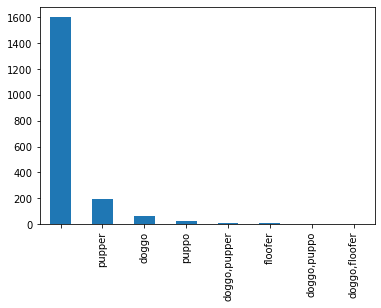

In [214]:
total_combined['stage'].value_counts().plot(kind='bar')

from the above insight we can see that stage pupper is the most available with 194 puppers

### Which tweet_id had the highest retweet count and on what day

In [217]:
total_combined.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8853,39467,False,False,False,False,en
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,6514,33819,False,False,False,False,en
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,4328,25461,False,False,False,False,en
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,8964,42908,False,False,False,False,en
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,9774,41048,False,False,False,False,en


In [216]:
total_combined.sort_values(by ='retweet_count', ascending=False)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
756,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,79515,131075,False,False,False,False,en
395,807106840509214720,2016-12-09 06:17:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13.0,10.0,Stephan,,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,56625,107015,False,False,False,False,en
788,739238157791694849,2016-06-04 23:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,52360,75163,False,False,False,False,en
304,822872901745569793,2017-01-21 18:26:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,...,"{'hashtags': [{'text': 'WomensMarch', 'indices...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,48265,132810,False,False,False,False,en
56,879415818425184262,2017-06-26 19:07:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13.0,10.0,Duddles,,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,45849,107956,False,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5.0,10.0,None,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,41,111,False,False,False,False,en
1886,666268910803644416,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,10.0,10.0,None,,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,37,108,False,False,False,False,en
1790,668291999406125056,2015-11-22 04:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,10.0,10.0,None,,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,34,264,False,False,False,False,en
1873,666447344410484738,2015-11-17 02:46:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. She is a black Downton Abbey. I...,9.0,10.0,Scout,,https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,23,107,False,False,False,False,en


In [219]:
total_combined.sort_values(by ='retweet_count', ascending=False).head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,...,entities,user,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
756,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'id': 4196983835, 'id_str': '4196983835', 'na...",False,79515,131075,False,False,False,False,en


#### This ID (744234799360020481) had the highest retweet count on the day 2016-06-18  with 79515 retweets

### what are the tweet_ids of the top five most favorited tweets.

In [221]:
tweet_id_and_favorite_count = total_combined[["tweet_id", "favorite_count"]]

C:\Users\User PC\miniconda3\envs\oyiza\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


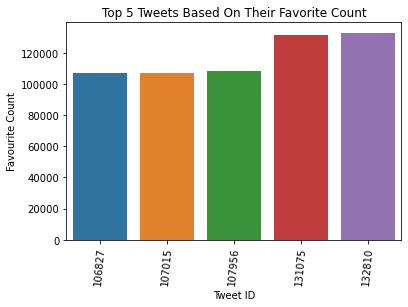

In [224]:
ax = sns.barplot(
    tweet_id_and_favorite_count.sort_values(by = "favorite_count", ascending=False).head(5).favorite_count, 
    tweet_id_and_favorite_count.sort_values(by = "favorite_count", ascending=False).head(5).favorite_count)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Tweet ID', ylabel='Favourite Count', title = 'Top 5 Tweets Based On Their Favorite Count')
plt.show()

### how many tweets contain possibly sensitive tweets


In [232]:
total_combined['possibly_sensitive'].value_counts()

False    1896
Name: possibly_sensitive, dtype: int64

<AxesSubplot:ylabel='possibly_sensitive'>

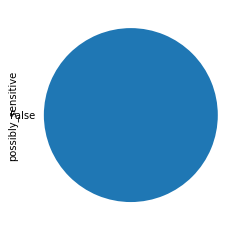

In [233]:
total_combined['possibly_sensitive'].value_counts().plot(kind='pie')

from the above insights we can see that all dataset does not contain tweets that are possibly sensitive.

 ### What language is the most represented

In [234]:
total_combined['lang'].value_counts()

en    1889
nl       3
in       2
eu       1
et       1
Name: lang, dtype: int64

<AxesSubplot:>

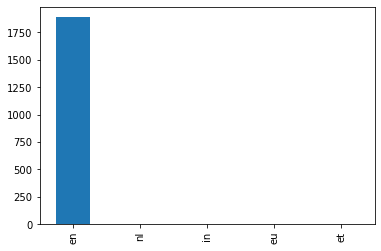

In [235]:
total_combined['lang'].value_counts().plot(kind='bar')

It is evident in this insight that english is by a huge ration the most represented language

### What time had the highest retweet_count.

<AxesSubplot:xlabel='created_at'>

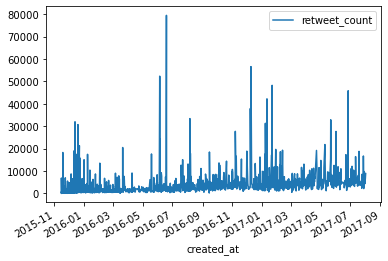

In [237]:
total_combined.plot(x='created_at', y='retweet_count')

We can see that around 2016-06 the highest retweet count was recorded